In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [101]:
df = pd.read_csv('AVANCE.csv', sep=';')

In [102]:
df

,Año,Mes,Nº Anual,Nº Mes,Edad,Estado civil,Escolaridad,Años Escolaridad,Escolaridad.1,Previsión,...,APGAR 1,APGAR 2,APGAR 3,EGP,Patología RN,Destino,Fecha nacimiento madre,Apego,Observaciones2,Observaciones.1
0,2015,1,1,1,34.0,CASADA,6B,6,Básica,SP,...,9.0,9.0,NaN,41.0,NaN,NaN,NaN,NaN,1 CIRCULAR APRETADA,1CAA
1,2015,1,2,2,19.0,CONVIVIENTE,8B,8,Básica,SP,...,9.0,9.0,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,3,3,19.0,SOLTERA,2M,10,Media,SP,...,8.0,9.0,NaN,41.0,NaN,NaN,NaN,NaN,"1 CIRCULAR AL CUELLO IRREDUCTIBLE, MECONIO +","1CACI, MEC+"
3,2015,1,4,4,32.0,CONVIVIENTE,5S,17,Superior,FONASA,...,9.0,9.0,NaN,38.0,NaN,NaN,NaN,NaN,CESAREA,CES
4,2015,1,5,5,28.0,CASADA,4M,12,Media,FONASA,...,9.0,9.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2016,1,133,133,42.0,CONVIVIENTE,8B,8,Básica,SP,...,6.0,9.0,NaN,33.0,NaN,NaN,NaN,NaN,"RPM >24HRS, SINDROME DE PARTO PREMATURO","RPM, SDPP"
2312,2016,1,134,134,23.0,SOLTERA,2S,14,Superior,FONASA,...,9.0,9.0,NaN,38.0,NaN,NaN,NaN,NaN,RPM 12 HRS,RPM
2313,2016,1,135,135,32.0,CONVIVIENTE,5S,17,Superior,FONASA,...,9.0,9.0,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN
2314,2016,1,136,136,21.0,CONVIVIENTE,4M,12,Media,SP,...,9.0,9.0,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# tabla de frecuencia relativa edades de pacientes
100 * df['Edad'].value_counts() / len(df['Edad'])

21.0    5.872193
27.0    5.699482
25.0    5.613126
30.0    5.569948
24.0    5.354059
23.0    5.138169
28.0    5.008636
19.0    4.922280
26.0    4.749568
22.0    4.620035
20.0    4.490501
31.0    4.404145
33.0    4.360967
29.0    4.058722
32.0    3.972366
18.0    3.367876
34.0    3.065630
35.0    2.849741
17.0    2.547496
37.0    2.374784
38.0    2.029361
36.0    1.856649
16.0    1.683938
15.0    1.295337
39.0    1.252159
40.0    0.949914
41.0    0.949914
42.0    0.518135
14.0    0.474957
43.0    0.388601
44.0    0.172712
13.0    0.086356
45.0    0.086356
Name: Edad, dtype: float64

In [104]:
# tabla de frecuencia de edades embarazadas en orden decreciente
pd.value_counts(df['Edad'])

21.0    136
27.0    132
25.0    130
30.0    129
24.0    124
23.0    119
28.0    116
19.0    114
26.0    110
22.0    107
20.0    104
31.0    102
33.0    101
29.0     94
32.0     92
18.0     78
34.0     71
35.0     66
17.0     59
37.0     55
38.0     47
36.0     43
16.0     39
15.0     30
39.0     29
40.0     22
41.0     22
42.0     12
14.0     11
43.0      9
44.0      4
13.0      2
45.0      2
Name: Edad, dtype: int64

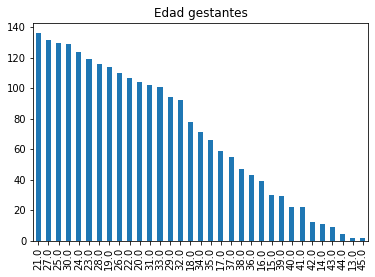

In [105]:
# Gráfico de edad de gestantes
plot = df['Edad'].value_counts().plot(kind='bar',
                                            title='Edad gestantes')

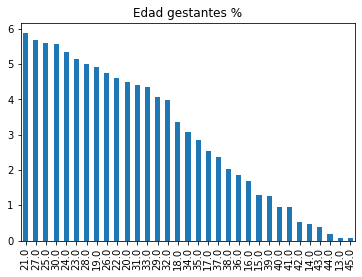

In [106]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['Edad'].value_counts() / len(df['Edad'])).plot(
kind='bar', title='Edad gestantes %')

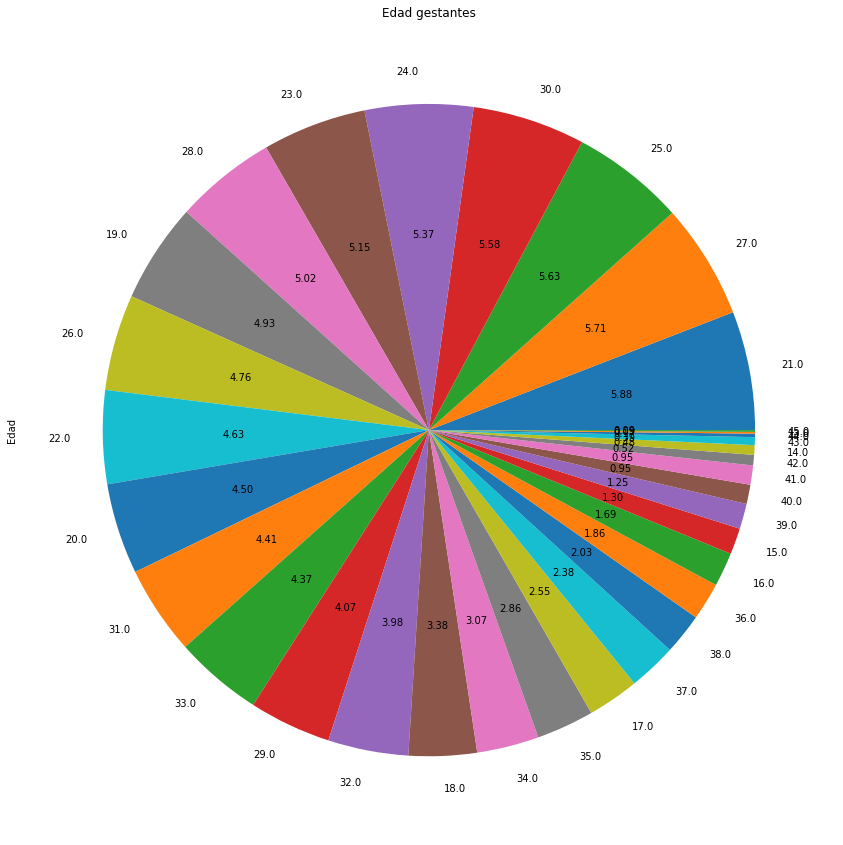

In [107]:
# Gráfico de tarta edades gestantes
plot = df['Edad'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(20, 15),
                                            title='Edad gestantes')

In [120]:
# tabla de frecuencia relativa estado nutricional inicio gestación
100 * df['I'].value_counts() / len(df['I'])

N    37.867012
S    30.224525
O    26.165803
E     5.742660
Name: I, dtype: float64

In [121]:
# tabla de frecuencia estado nutricional inicio gestación
pd.value_counts(df['I'])

N    877
S    700
O    606
E    133
Name: I, dtype: int64

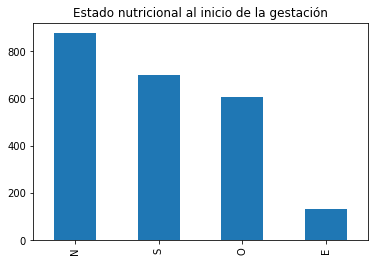

In [122]:
# Gráfico de barras estado nutricional al inicio del la gestación
plot = df['I'].value_counts().plot(kind='bar',
                                            title='Estado nutricional al inicio de la gestación')

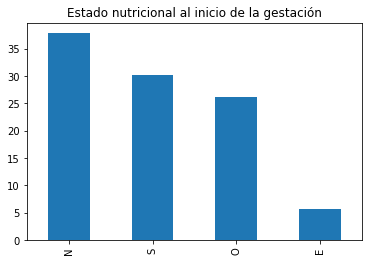

In [123]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['I'].value_counts() / len(df['I'])).plot(
kind='bar', title='Estado nutricional al inicio de la gestación')

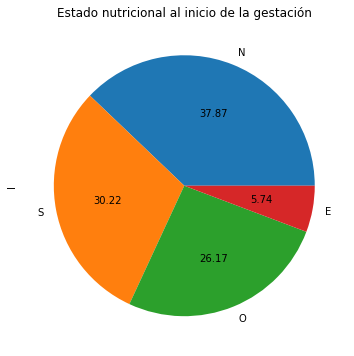

In [128]:
# Gráfico de tarta estado nutricional al inicio de la gestación
plot = df['I'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Estado nutricional al inicio de la gestación')

In [131]:
# Tabla de contingencia Edad/ / Peso inicio gestación
pd.crosstab(index=df['I'],
            columns=df['Edad'], margins=True)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,All
I,,,,,,,,,,,,,,,,,,,,,
E,0,2,3,10,10,14,16,12,10,7,...,1,0,0,1,0,1,0,0,0,133
N,2,5,19,15,30,41,37,45,51,46,...,18,16,10,8,4,1,3,1,0,877
O,0,2,4,2,7,11,23,14,27,31,...,14,13,6,4,6,6,2,1,2,602
S,0,2,4,12,12,12,38,33,48,23,...,22,18,13,9,12,4,4,2,0,699
All,2,11,30,39,59,78,114,104,136,107,...,55,47,29,22,22,12,9,4,2,2311


In [109]:
 #tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['I'], columns=df['Edad'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,All
I,,,,,,,,,,,,,,,,,,,,,
E,0.000000,0.086356,0.129534,0.431779,0.431779,0.604491,0.690846,0.518135,0.431779,0.302245,...,0.043178,0.000000,0.000000,0.043178,0.000000,0.043178,0.000000,0.000000,0.000000,5.742660
N,0.086356,0.215889,0.820380,0.647668,1.295337,1.770294,1.597582,1.943005,2.202073,1.986183,...,0.777202,0.690846,0.431779,0.345423,0.172712,0.043178,0.129534,0.043178,0.000000,37.867012
O,0.000000,0.086356,0.172712,0.086356,0.302245,0.474957,0.993092,0.604491,1.165803,1.338515,...,0.604491,0.561313,0.259067,0.172712,0.259067,0.259067,0.086356,0.043178,0.086356,25.993092
S,0.000000,0.086356,0.172712,0.518135,0.518135,0.518135,1.640760,1.424870,2.072539,0.993092,...,0.949914,0.777202,0.561313,0.388601,0.518135,0.172712,0.172712,0.086356,0.000000,30.181347
All,0.086356,0.474957,1.295337,1.683938,2.547496,3.367876,4.922280,4.490501,5.872193,4.620035,...,2.374784,2.029361,1.252159,0.949914,0.949914,0.518135,0.388601,0.172712,0.086356,99.784111


In [110]:
# tabla de contingencia en porcentajes relativos segun estado nutricional al inicio de la gestación
pd.crosstab(index=df['I'], columns=df['Edad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
I,,,,,,,,,,,,,,,,,,,,,
E,0.00000,1.503759,2.255639,7.518797,7.518797,10.526316,12.030075,9.022556,7.518797,5.263158,...,0.751880,0.751880,0.000000,0.000000,0.751880,0.000000,0.751880,0.000000,0.000000,0.000000
N,0.22805,0.570125,2.166477,1.710376,3.420753,4.675029,4.218928,5.131129,5.815279,5.245154,...,2.280502,2.052452,1.824401,1.140251,0.912201,0.456100,0.114025,0.342075,0.114025,0.000000
O,0.00000,0.332226,0.664452,0.332226,1.162791,1.827243,3.820598,2.325581,4.485050,5.149502,...,1.993355,2.325581,2.159468,0.996678,0.664452,0.996678,0.996678,0.332226,0.166113,0.332226
S,0.00000,0.286123,0.572246,1.716738,1.716738,1.716738,5.436338,4.721030,6.866953,3.290415,...,1.430615,3.147353,2.575107,1.859800,1.287554,1.716738,0.572246,0.572246,0.286123,0.000000


In [111]:
#tabla de contingencia en porcentajes relativos segun estado nutricional
pd.crosstab(index=df['I'], columns=df['Edad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
I,,,,,,,,,,,,,,,,,,,,,
E,0.0,18.181818,10.000000,25.641026,16.949153,17.948718,14.035088,11.538462,7.352941,6.542056,...,2.325581,1.818182,0.000000,0.000000,4.545455,0.000000,8.333333,0.000000,0.0,0.0
N,100.0,45.454545,63.333333,38.461538,50.847458,52.564103,32.456140,43.269231,37.500000,42.990654,...,46.511628,32.727273,34.042553,34.482759,36.363636,18.181818,8.333333,33.333333,25.0,0.0
O,0.0,18.181818,13.333333,5.128205,11.864407,14.102564,20.175439,13.461538,19.852941,28.971963,...,27.906977,25.454545,27.659574,20.689655,18.181818,27.272727,50.000000,22.222222,25.0,100.0
S,0.0,18.181818,13.333333,30.769231,20.338983,15.384615,33.333333,31.730769,35.294118,21.495327,...,23.255814,40.000000,38.297872,44.827586,40.909091,54.545455,33.333333,44.444444,50.0,0.0


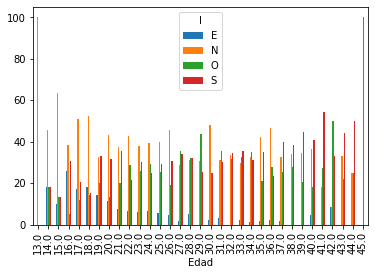

In [112]:
# Gráfico de barras de edad según estado nutricional al inicio de la gestación
plot = pd.crosstab(index=df['Edad'],
            columns=df['I']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

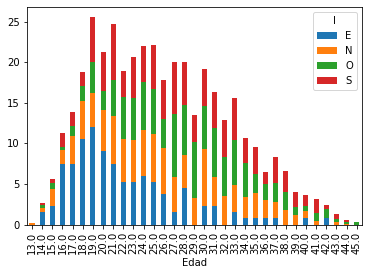

In [130]:
# Gráfico de barras de edad segun estado nutricional al inicio de la gestación
plot = pd.crosstab(index=df['Edad'],
            columns=df['I']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [132]:
# tabla de frecuencia relativa estado nutricional final gestación
100 * df['E'].value_counts() / len(df['E'])

O    37.003454
S    32.124352
N    27.115717
E     3.670121
Name: E, dtype: float64

In [133]:
# tabla de frecuencia estado nutricional final gestación
pd.value_counts(df['E'])

O    857
S    744
N    628
E     85
Name: E, dtype: int64

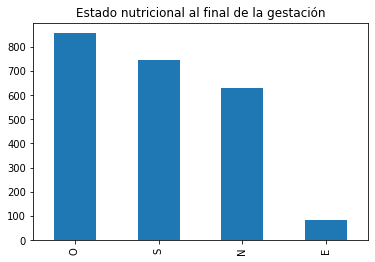

In [135]:
# Gráfico de barras estado nutricional al inicio del la gestación
plot = df['E'].value_counts().plot(kind='bar',
                                            title='Estado nutricional al final de la gestación')

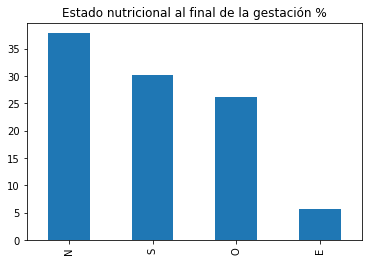

In [148]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['I'].value_counts() / len(df['E'])).plot(
kind='bar', title='Estado nutricional al final de la gestación %')

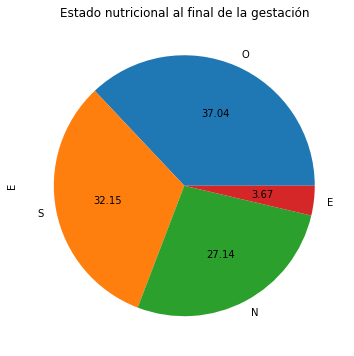

In [137]:
# Gráfico de tarta estado nutricional al inicio de la gestación
plot = df['E'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Estado nutricional al final de la gestación')

In [138]:
# Tabla de contingencia Edad / Peso final gestación
pd.crosstab(index=df['E'],
            columns=df['Edad'], margins=True)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,All
E,,,,,,,,,,,,,,,,,,,,,
E,0,0,1,8,6,10,12,7,5,2,...,1,0,0,0,0,2,0,0,0,85
N,2,4,11,14,23,34,30,39,32,32,...,11,10,6,7,2,0,1,1,0,628
O,0,2,6,8,16,18,34,25,42,38,...,20,18,11,5,8,6,5,2,2,853
S,0,5,12,9,14,16,38,33,57,35,...,23,19,12,10,12,4,3,1,0,743
All,2,11,30,39,59,78,114,104,136,107,...,55,47,29,22,22,12,9,4,2,2309


In [139]:
 #tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['E'], columns=df['Edad'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,All
E,,,,,,,,,,,,,,,,,,,,,
E,0.000000,0.000000,0.043178,0.345423,0.259067,0.431779,0.518135,0.302245,0.215889,0.086356,...,0.043178,0.000000,0.000000,0.000000,0.000000,0.086356,0.000000,0.000000,0.000000,3.670121
N,0.086356,0.172712,0.474957,0.604491,0.993092,1.468048,1.295337,1.683938,1.381693,1.381693,...,0.474957,0.431779,0.259067,0.302245,0.086356,0.000000,0.043178,0.043178,0.000000,27.115717
O,0.000000,0.086356,0.259067,0.345423,0.690846,0.777202,1.468048,1.079447,1.813472,1.640760,...,0.863558,0.777202,0.474957,0.215889,0.345423,0.259067,0.215889,0.086356,0.086356,36.830743
S,0.000000,0.215889,0.518135,0.388601,0.604491,0.690846,1.640760,1.424870,2.461140,1.511226,...,0.993092,0.820380,0.518135,0.431779,0.518135,0.172712,0.129534,0.043178,0.000000,32.081174
All,0.086356,0.474957,1.295337,1.683938,2.547496,3.367876,4.922280,4.490501,5.872193,4.620035,...,2.374784,2.029361,1.252159,0.949914,0.949914,0.518135,0.388601,0.172712,0.086356,99.697755


In [140]:
# tabla de contingencia en porcentajes relativos segun estado nutricional al final de la gestación
pd.crosstab(index=df['E'], columns=df['Edad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
E,,,,,,,,,,,,,,,,,,,,,
E,0.000000,0.000000,1.176471,9.411765,7.058824,11.764706,14.117647,8.235294,5.882353,2.352941,...,0.000000,1.176471,0.000000,0.000000,0.000000,0.000000,2.352941,0.000000,0.000000,0.000000
N,0.318471,0.636943,1.751592,2.229299,3.662420,5.414013,4.777070,6.210191,5.095541,5.095541,...,2.229299,1.751592,1.592357,0.955414,1.114650,0.318471,0.000000,0.159236,0.159236,0.000000
O,0.000000,0.234467,0.703400,0.937866,1.875733,2.110199,3.985932,2.930832,4.923798,4.454865,...,1.992966,2.344666,2.110199,1.289566,0.586166,0.937866,0.703400,0.586166,0.234467,0.234467
S,0.000000,0.672948,1.615074,1.211306,1.884253,2.153432,5.114401,4.441454,7.671602,4.710633,...,1.615074,3.095559,2.557201,1.615074,1.345895,1.615074,0.538358,0.403769,0.134590,0.000000


In [141]:
#tabla de contingencia en porcentajes relativos segun estado nutricional al final de la gestación
pd.crosstab(index=df['E'], columns=df['Edad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
E,,,,,,,,,,,,,,,,,,,,,
E,0.0,0.000000,3.333333,20.512821,10.169492,12.820513,10.526316,6.730769,3.676471,1.869159,...,0.000000,1.818182,0.000000,0.000000,0.000000,0.000000,16.666667,0.000000,0.0,0.0
N,100.0,36.363636,36.666667,35.897436,38.983051,43.589744,26.315789,37.500000,23.529412,29.906542,...,32.558140,20.000000,21.276596,20.689655,31.818182,9.090909,0.000000,11.111111,25.0,0.0
O,0.0,18.181818,20.000000,20.512821,27.118644,23.076923,29.824561,24.038462,30.882353,35.514019,...,39.534884,36.363636,38.297872,37.931034,22.727273,36.363636,50.000000,55.555556,50.0,100.0
S,0.0,45.454545,40.000000,23.076923,23.728814,20.512821,33.333333,31.730769,41.911765,32.710280,...,27.906977,41.818182,40.425532,41.379310,45.454545,54.545455,33.333333,33.333333,25.0,0.0


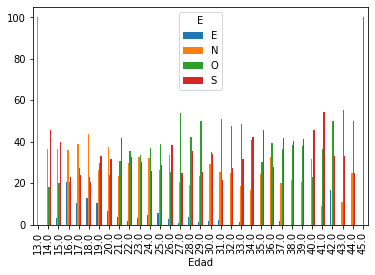

In [142]:
# Gráfico de barras de edad según estado nutricional al final de la gestación
plot = pd.crosstab(index=df['Edad'],
            columns=df['E']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

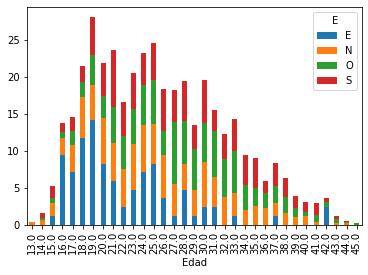

In [143]:
# Gráfico de barras de edad segun estado nutricional al inicio de la gestación
plot = pd.crosstab(index=df['Edad'],
            columns=df['E']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [151]:
# tabla de frecuencia relativa tipo de parto
100 * df['Tipo'].value_counts() / len(df['Tipo'])

C    54.360967
P    44.775475
F     0.863558
Name: Tipo, dtype: float64

In [145]:
# tabla de frecuencia tipo de parto
pd.value_counts(df['Tipo'])

C    1259
P    1037
F      20
Name: Tipo, dtype: int64

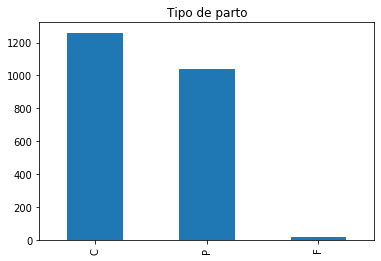

In [146]:
# Gráfico de barras tipo de parto
plot = df['Tipo'].value_counts().plot(kind='bar',
                                            title='Tipo de parto')

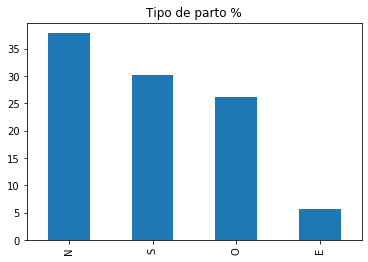

In [147]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['I'].value_counts() / len(df['Tipo'])).plot(
kind='bar', title='Tipo de parto %')

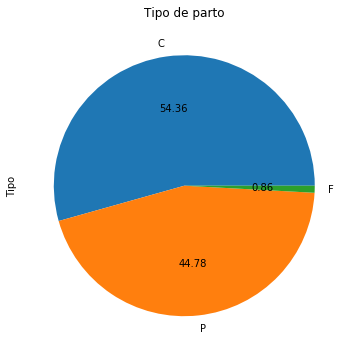

In [149]:
# Gráfico de tarta tipo de parto
plot = df['Tipo'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Tipo de parto')

In [150]:
# Tabla de contingencia Edad / Tipo de parto
pd.crosstab(index=df['Tipo'],
            columns=df['Edad'], margins=True)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,All
Tipo,,,,,,,,,,,,,,,,,,,,,
C,0,6,11,14,12,26,40,40,60,48,...,40,34,20,15,13,9,6,3,1,1255
F,0,0,1,0,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,20
P,2,5,18,25,47,51,74,64,75,57,...,15,13,9,7,9,3,3,1,1,1036
All,2,11,30,39,59,78,114,104,136,107,...,55,47,29,22,22,12,9,4,2,2311


In [152]:
 #tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Tipo'], columns=df['Edad'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,All
Tipo,,,,,,,,,,,,,,,,,,,,,
C,0.000000,0.259067,0.474957,0.604491,0.518135,1.122625,1.727116,1.727116,2.590674,2.072539,...,1.727116,1.468048,0.863558,0.647668,0.561313,0.388601,0.259067,0.129534,0.043178,54.188256
F,0.000000,0.000000,0.043178,0.000000,0.000000,0.043178,0.000000,0.000000,0.043178,0.086356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.863558
P,0.086356,0.215889,0.777202,1.079447,2.029361,2.202073,3.195164,2.763385,3.238342,2.461140,...,0.647668,0.561313,0.388601,0.302245,0.388601,0.129534,0.129534,0.043178,0.043178,44.732297
All,0.086356,0.474957,1.295337,1.683938,2.547496,3.367876,4.922280,4.490501,5.872193,4.620035,...,2.374784,2.029361,1.252159,0.949914,0.949914,0.518135,0.388601,0.172712,0.086356,99.784111


In [153]:
# tabla de contingencia en porcentajes relativos edad y tipo parto
pd.crosstab(index=df['Tipo'], columns=df['Edad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
Tipo,,,,,,,,,,,,,,,,,,,,,
C,0.00000,0.478088,0.876494,1.115538,0.956175,2.071713,3.187251,3.187251,4.780876,3.824701,...,2.868526,3.187251,2.709163,1.593625,1.195219,1.035857,0.717131,0.478088,0.239044,0.079681
F,0.00000,0.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P,0.19305,0.482625,1.737452,2.413127,4.536680,4.922780,7.142857,6.177606,7.239382,5.501931,...,0.675676,1.447876,1.254826,0.868726,0.675676,0.868726,0.289575,0.289575,0.096525,0.096525


In [154]:
#tabla de contingencia en porcentajes relativos edad y tipo de parto
pd.crosstab(index=df['Tipo'], columns=df['Edad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

Edad,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
Tipo,,,,,,,,,,,,,,,,,,,,,
C,0.0,54.545455,36.666667,35.897436,20.338983,33.333333,35.087719,38.461538,44.117647,44.859813,...,83.72093,72.727273,72.340426,68.965517,68.181818,59.090909,75.0,66.666667,75.0,50.0
F,0.0,0.000000,3.333333,0.000000,0.000000,1.282051,0.000000,0.000000,0.735294,1.869159,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
P,100.0,45.454545,60.000000,64.102564,79.661017,65.384615,64.912281,61.538462,55.147059,53.271028,...,16.27907,27.272727,27.659574,31.034483,31.818182,40.909091,25.0,33.333333,25.0,50.0


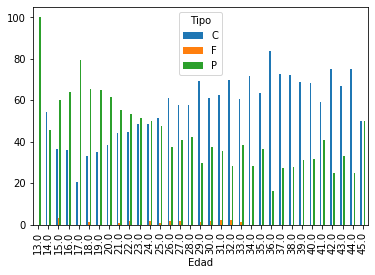

In [155]:
# Gráfico de barras de edad según edad y tipo de parto
plot = pd.crosstab(index=df['Edad'],
            columns=df['Tipo']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

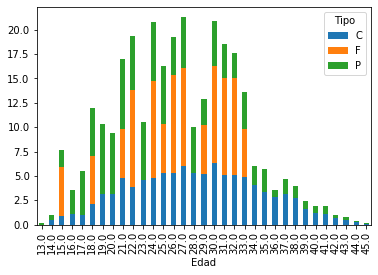

In [156]:
# Gráfico de barras de edad segun estado nutricional al inicio de la gestación
plot = pd.crosstab(index=df['Edad'],
            columns=df['Tipo']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [157]:
# Tabla de contingencia Peso inicio de parto / Tipo de parto
pd.crosstab(index=df['Tipo'],
            columns=df['I'], margins=True)

I,E,N,O,S,All
Tipo,,,,,
C,47,435,374,403,1259
F,0,16,1,3,20
P,86,426,231,294,1037
All,133,877,606,700,2316


In [158]:
 #tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Tipo'], columns=df['I'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

I,E,N,O,S,All
Tipo,,,,,
C,2.029361,18.782383,16.148532,17.400691,54.360967
F,0.000000,0.690846,0.043178,0.129534,0.863558
P,3.713299,18.393782,9.974093,12.694301,44.775475
All,5.742660,37.867012,26.165803,30.224525,100.000000


In [159]:
# tabla de contingencia en porcentajes relativos estado nutricional inicio y tipo parto
pd.crosstab(index=df['Tipo'], columns=df['I']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

I,E,N,O,S
Tipo,,,,
C,3.733122,34.551231,29.706116,32.009531
F,0.000000,80.000000,5.000000,15.000000
P,8.293153,41.080039,22.275796,28.351013


In [160]:
#tabla de contingencia en porcentajessegún estado nutricional inicio y tipo de parto
pd.crosstab(index=df['Tipo'], columns=df['I']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

I,E,N,O,S
Tipo,,,,
C,35.338346,49.600912,61.716172,57.571429
F,0.000000,1.824401,0.165017,0.428571
P,64.661654,48.574686,38.118812,42.000000


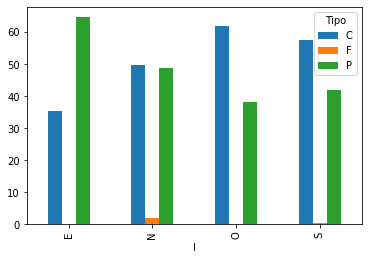

In [161]:
# Gráfico de barras de edad según estado nutricional inicio y tipo de parto
plot = pd.crosstab(index=df['I'],
            columns=df['Tipo']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

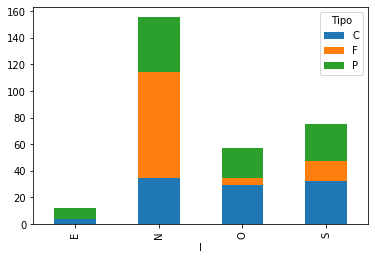

In [162]:
# Gráfico de barras segun estado nutricional al inicio de la gestación y tipo de parto
plot = pd.crosstab(index=df['I'],
            columns=df['Tipo']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [163]:
# Tabla de contingencia Peso final de parto / Tipo de parto
pd.crosstab(index=df['Tipo'],
            columns=df['E'], margins=True)

E,E,N,O,S,All
Tipo,,,,,
C,25,299,523,411,1258
F,0,10,2,8,20
P,60,319,332,325,1036
All,85,628,857,744,2314


In [164]:
 #tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Tipo'], columns=df['E'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

E,E,N,O,S,All
Tipo,,,,,
C,1.079447,12.910190,22.582038,17.746114,54.317789
F,0.000000,0.431779,0.086356,0.345423,0.863558
P,2.590674,13.773748,14.335060,14.032815,44.732297
All,3.670121,27.115717,37.003454,32.124352,99.913644


In [165]:
# tabla de contingencia en porcentajes relativos estado nutricional final y tipo parto
pd.crosstab(index=df['Tipo'], columns=df['E']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

E,E,N,O,S
Tipo,,,,
C,1.987281,23.767886,41.573927,32.670906
F,0.000000,50.000000,10.000000,40.000000
P,5.791506,30.791506,32.046332,31.370656


In [166]:
#tabla de contingencia en porcentajessegún estado nutricional final y tipo de parto
pd.crosstab(index=df['Tipo'], columns=df['E']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

E,E,N,O,S
Tipo,,,,
C,29.411765,47.611465,61.026838,55.241935
F,0.000000,1.592357,0.233372,1.075269
P,70.588235,50.796178,38.739790,43.682796


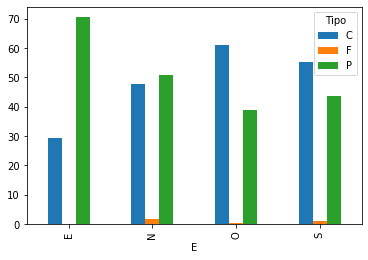

In [167]:
# Gráfico de barras de edad según estado nutricional final y tipo de parto
plot = pd.crosstab(index=df['E'],
            columns=df['Tipo']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

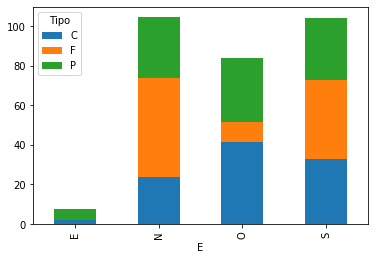

In [168]:
# Gráfico de barras segun estado nutricional alfinal de la gestación y tipo de parto
plot = pd.crosstab(index=df['E'],
            columns=df['Tipo']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)